In [7]:
# Importing dependencies
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [8]:
# API login
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [13]:
# Importing data
first_date = '2019-01-01'
last_date = '2021-01-01'
raw_data = te.fetchMarkets(symbol=['aapl:us', 'msft:us','hpq:us','sne:us','ibm:us','csco:us'], initDate=first_date, endDate= last_date, output_type='df')[['symbol','close']]


In [14]:
# Data Manipulation
raw_apple_data = raw_data.loc[raw_data['symbol'] == 'AAPL:US']
raw_apple_data.index.name = 'Date'
raw_microsoft_data = raw_data.loc[raw_data['symbol'] == 'MSFT:US']
raw_microsoft_data.index.name = 'Date'
raw_hp_data = raw_data.loc[raw_data['symbol'] == 'HPQ:US']
raw_hp_data.index.name = 'Date'
raw_sony_data = raw_data.loc[raw_data['symbol'] == 'SNE:US']
raw_sony_data.index.name = 'Date'
raw_ibm_data = raw_data.loc[raw_data['symbol'] == 'IBM:US']
raw_ibm_data.index.name = 'Date'
raw_cisco_data = raw_data.loc[raw_data['symbol'] == 'CSCO:US']
raw_cisco_data.index.name = 'Date'

apple = raw_apple_data[['close']].rename(columns={'close': 'Apple'})
microsoft = raw_microsoft_data[['close']].rename(columns={'close': 'Microsoft'})
hp = raw_hp_data[['close']].rename(columns={'close': 'HP'})
sony = raw_sony_data[['close']].rename(columns={'close': 'Sony'})
ibm = raw_ibm_data[['close']].rename(columns={'close': 'IBM'})
cisco = raw_cisco_data[['close']].rename(columns={'close': 'Cisco'})

df = pd.merge(pd.merge(pd.merge(pd.merge(apple,microsoft, on='Date'),pd.merge(hp,sony, on='Date'), on='Date'),ibm, on = 'Date'),cisco, on = 'Date')
last_index = len(df.index.values.tolist())-1
df = df.iloc[[last_index, 0]]
df

,Apple,Microsoft,HP,Sony,IBM,Cisco
Date,,,,,,
2019-01-09,38.3375,104.18,21.31,49.9,120.59,43.35
2020-12-31,132.6900,222.42,24.59,101.1,125.88,44.75


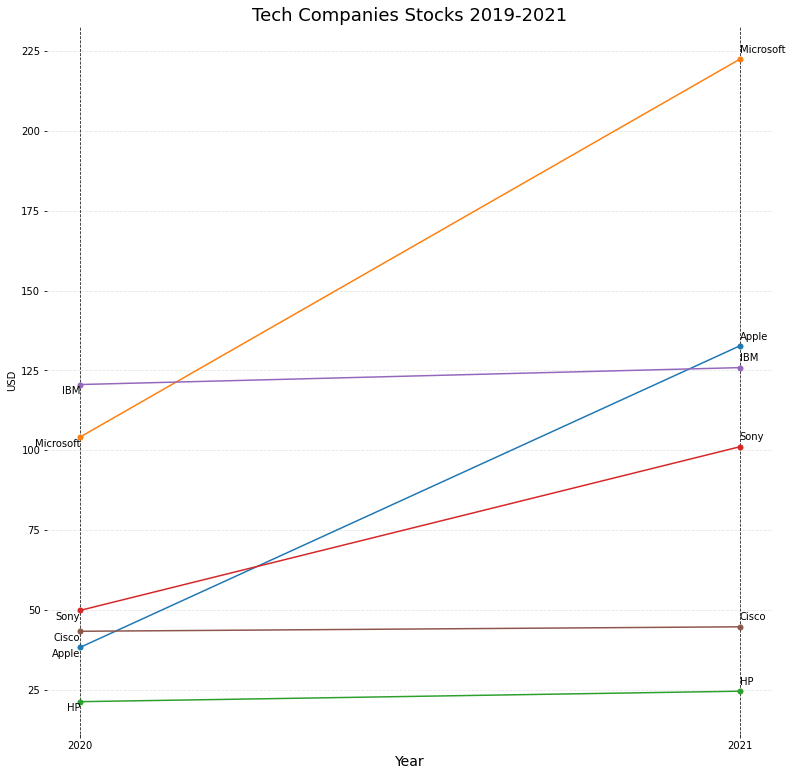

In [15]:
# Plotting
companies = df.columns.tolist()
years = ['2020','2021']

fig, ax = plt.subplots(1, figsize=(13,13))

for i in companies:
   
    plt.plot(years, df[i], marker='o', markersize=5)
    plt.text(years[0], df[i][0]-3, i, ha='right')
    plt.text(years[1], df[i][1]+2, i, ha='left')


plt.xticks(years)

plt.title('Tech Companies Stocks 2019-2021',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.ylabel('USD')
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
